<a href="https://colab.research.google.com/github/mjaliz/tfztm/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural netwoks for classification problems.

A classification problem is where you try to classify as one thing or another thing.

A few types of classification problems:
* Binary classification
* Muliticlass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the lables
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


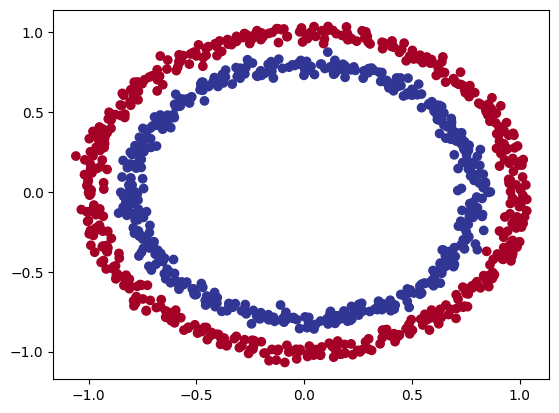

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [9]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 5ms/step - loss: 5.7888 - accuracy: 0.4820
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 4.7645 - accuracy: 0.4640
Epoch 3/5
32/32 [==============================] - 0s 9ms/step - loss: 4.4713 - accuracy: 0.4660
Epoch 4/5
32/32 [==============================] - 0s 11ms/step - loss: 4.0001 - accuracy: 0.4900
Epoch 5/5
32/32 [==============================] - 0s 11ms/step - loss: 2.9565 - accuracy: 0.4940


In [11]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing. So let's step thins up a notch and add and extra layer.

In [12]:
# Set the rando seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932541728019714, 0.5]

In [14]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improve our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer epochs)

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934249401092529, 0.5]

To visualize our model's predictions, let's crate a function `plot_decision_boundry`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model prediction on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them reaady for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing multiclass classification


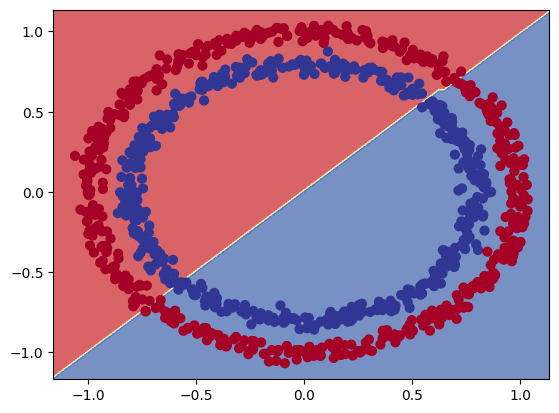

In [18]:
# Check out the predictions our model is making
plot_decision_boundary(model_3,
                       X,
                       y)

In [19]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: -3839.3291 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

Oh wait... we compiled our model for a binary classification problem.
But... we're now working on a regression problem, let's change the model to suit our data.

In [20]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=(None, 1)),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 537.1603 - mae: 537.1603
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 423.9756 - mae: 423.9756
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 332.0436 - mae: 332.0436
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 274.7669 - mae: 274.7669
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 257.8265 - mae: 257.8265
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 260.1787 - mae: 260.1787
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 260.5644 - mae: 260.5644
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 257.5216 - mae: 257.5216
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 261.0498 - mae: 261.0498
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 256.7094 - mae: 256.7094
Epoch 11/100
5/5 [=====================

2/2 [==============================] - 0s 7ms/step


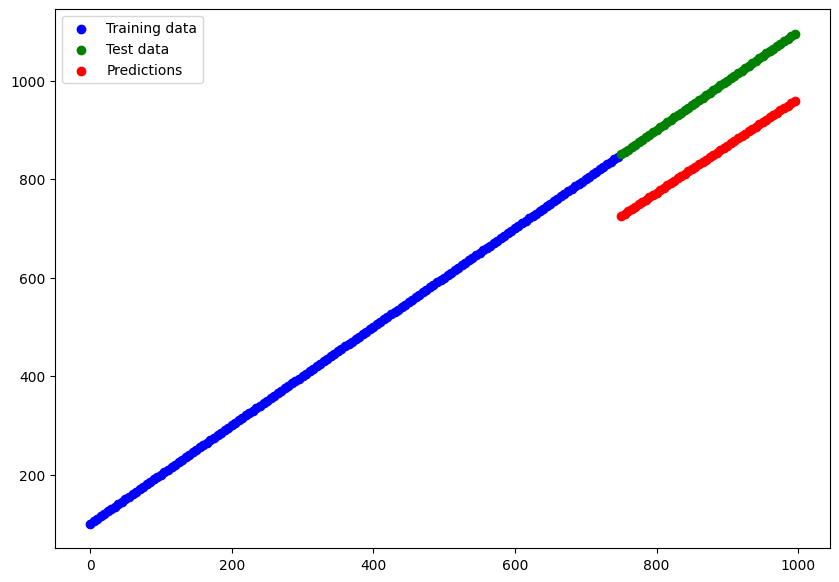

In [21]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [22]:
# Set random seed
tf.random.set_seed(42)

# 1. Crete the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.6844 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6644 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6423 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6346 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5722 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5610 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5204 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4714 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4330 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4270 - accuracy: 0.4820
Epoch 11/

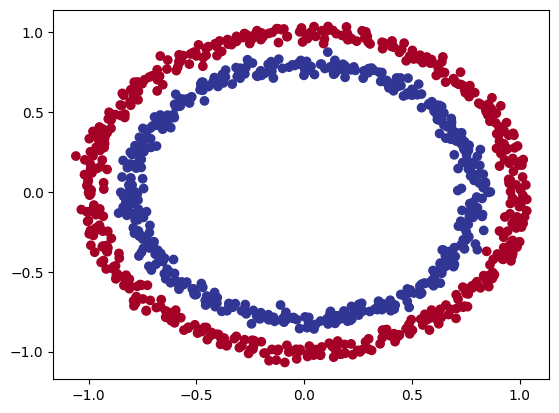

In [23]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


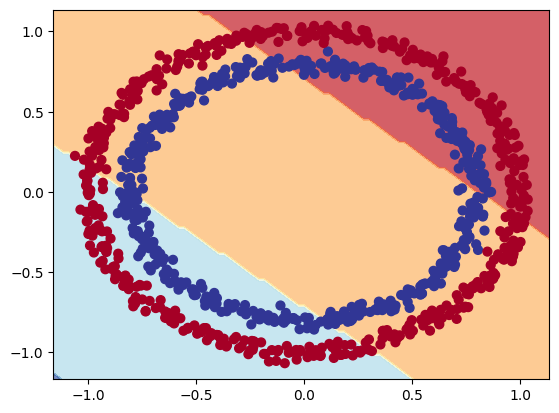

In [24]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4,
                       X, y)

Let's try build our first neural network with non-linear activation function

In [25]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.4362 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4135 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4013 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3907 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3822 - accuracy: 0.4700
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3585 - accuracy: 0.4700
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3341 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3274 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3213 - accuracy: 0.4700
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3165 - accuracy: 0.4700
Epoch 11/

In [26]:
# Time to replicate the multi-layer neural network form TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 1.0666 - accuracy: 0.4350
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9052 - accuracy: 0.3810
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8616 - accuracy: 0.3840
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8378 - accuracy: 0.3930
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8194 - accuracy: 0.4040
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8047 - accuracy: 0.3910
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7921 - accuracy: 0.3950
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7825 - accuracy: 0.3890
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7737 - accuracy: 0.3790
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7666 - accuracy: 0.3520
Epoch 11/

In [27]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9970


[0.021184761077165604, 0.996999979019165]

313/313 [==============================] - 0s 1ms/step
doing binary classification


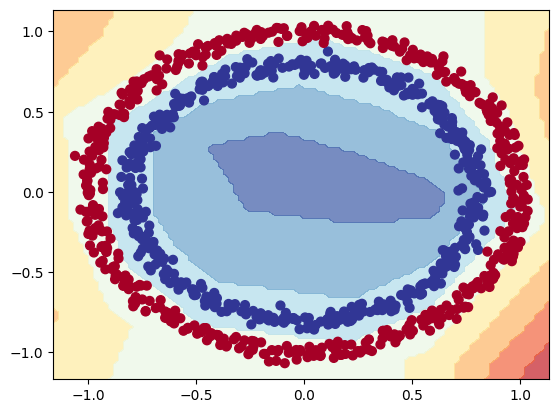

In [28]:
# Hoe do our model predictions look?
plot_decision_boundary(model_6, X,y)

In [29]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y , epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 0.6915 - accuracy: 0.5010
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5060
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5080
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5130
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5140
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5120
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5200
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5160
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5200
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5210
Epoch 11/

In [30]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.8990


[0.2922707498073578, 0.8989999890327454]

313/313 [==============================] - 0s 1ms/step
doing binary classification


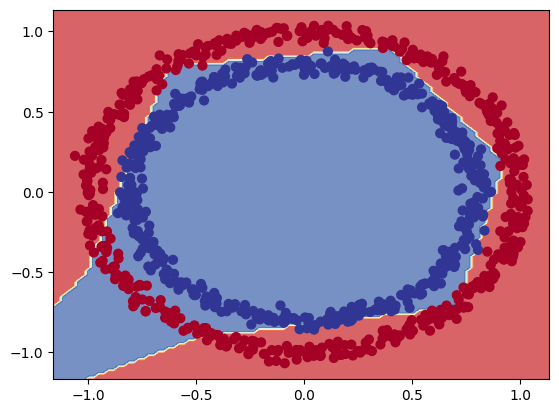

In [31]:
plot_decision_boundary(model_7, X, y)

In [32]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

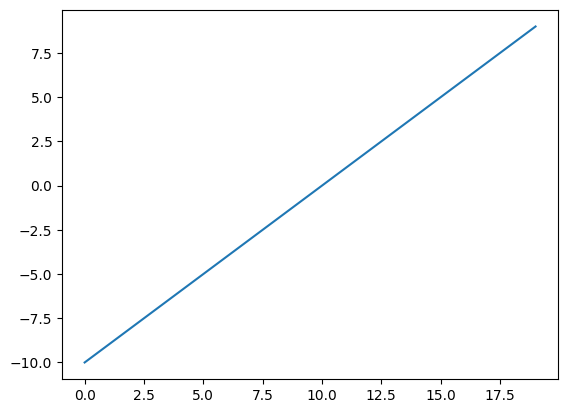

In [33]:
# Visualize our toy tensor
plt.plot(A);

In [34]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

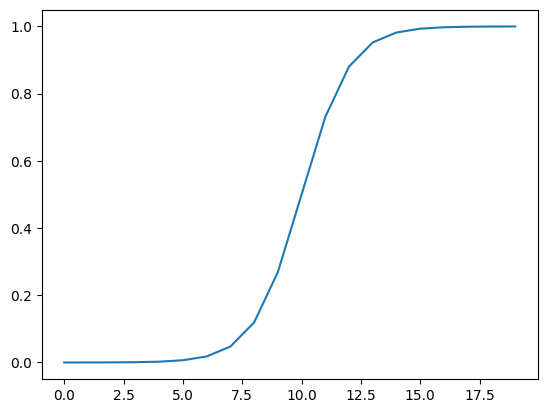

In [35]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [36]:
# Let's recreate relu function
def relu(x):
    return tf.maximum(x, 0)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

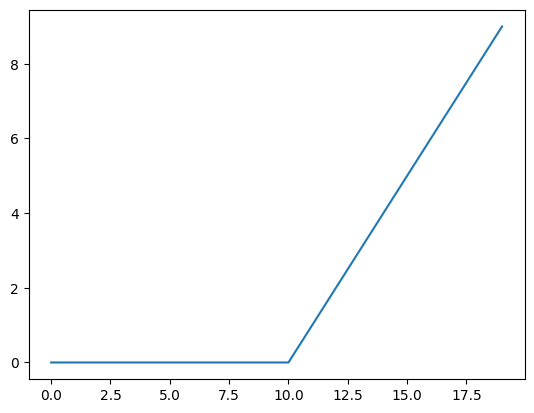

In [37]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [38]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

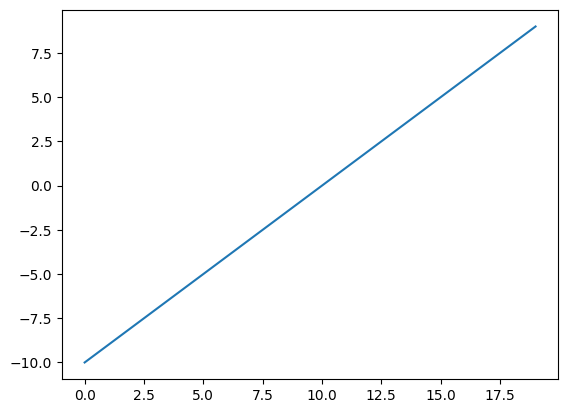

In [39]:
plt.plot(tf.keras.activations.linear(A));

In [40]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...
However, in machine learning this is basically a sin.
So let's crate training and test

In [41]:
# Split to train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [42]:
# Let's recrate a model to fit on the training data and evaluate on the test data
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.4913
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5150
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5263
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5575
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5713
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.5663
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6212
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6425
Epoch 9/25
25/25 [==============================] - 0s 14ms/step - loss: 0.6204 - accuracy: 0.6725
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.6950
Epoch 11/25
25/25 

In [43]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9800


[0.1708354502916336, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


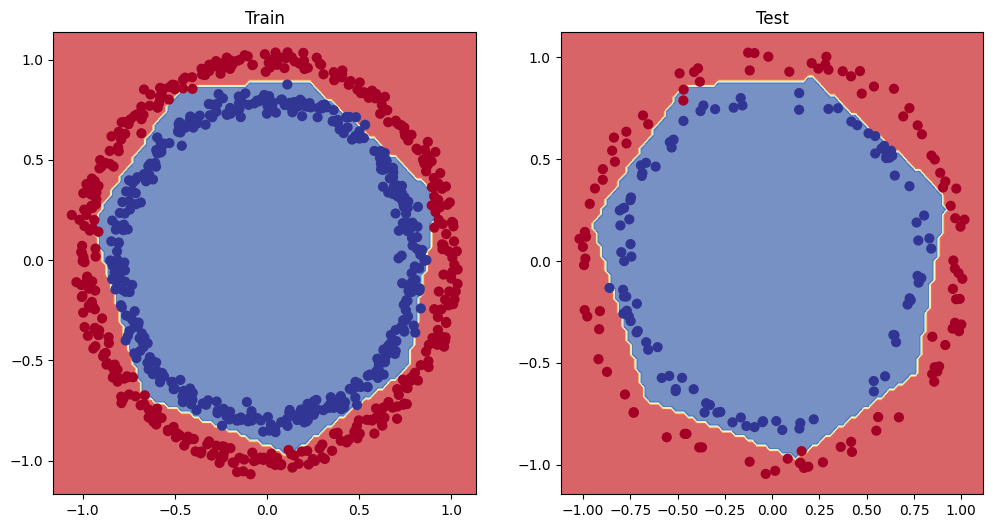

In [44]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show()

## Plot the loss (or training) curve

In [45]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.691755,0.49125
1,0.688855,0.51500
2,0.685973,0.52625
3,0.681336,0.55750
4,0.676196,0.57125
5,0.667994,0.56625
6,0.655313,0.62125
7,0.639856,0.64250
8,0.620402,0.67250
9,0.595012,0.69500


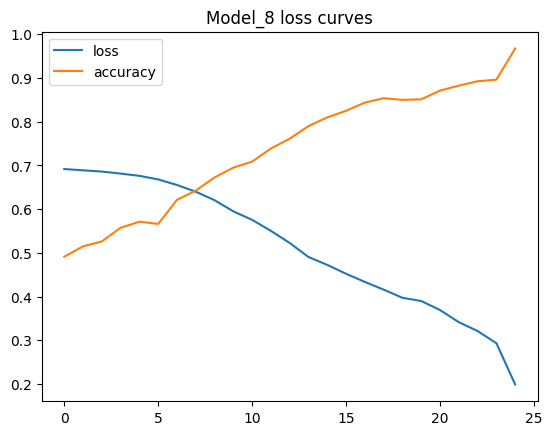

In [46]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

 ## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model while its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curve plot.

In [47]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7128 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7118 - accuracy: 0.4938 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.4938 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7107 - accuracy: 0.4850 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7101 - accuracy: 0.4787 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7093 - accuracy: 0.4700 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7087 - accuracy: 0.4650 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

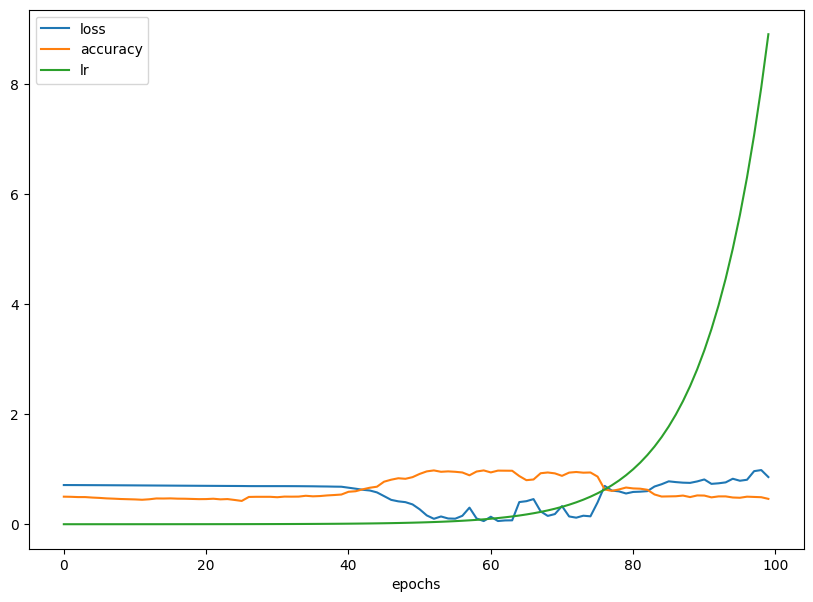

In [48]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

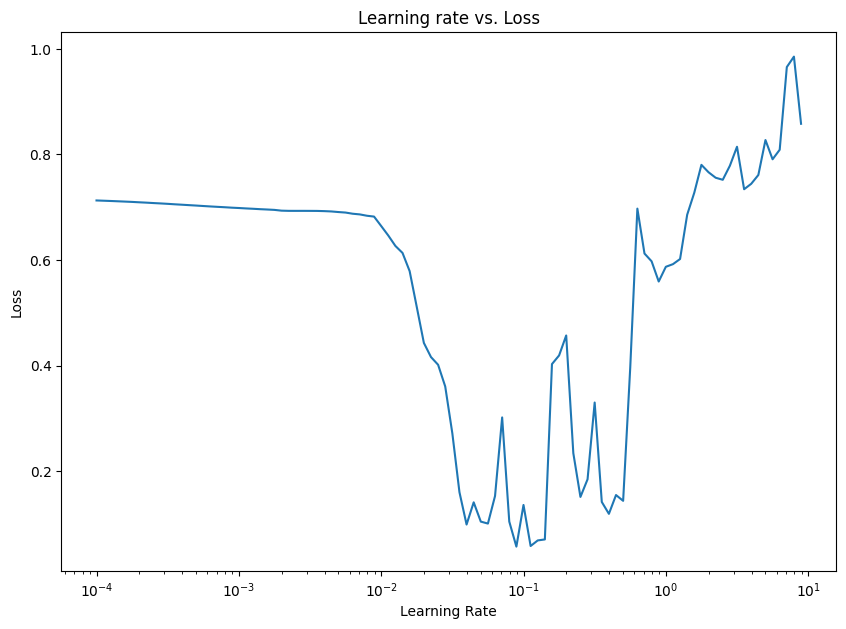

In [49]:
# Plot the learning rate versus the loss
lrs = 1e-4 * 10**(tf.range(100)/20)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [50]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [51]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.7068 - accuracy: 0.4800
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.5825
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.5688
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.6125
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.6500
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7275
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.7188
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5112 - accuracy: 0.7750
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.8012
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8238
Epoch 11/20
25/25 [

In [52]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.9100


[0.29144182801246643, 0.9100000262260437]

In [53]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9800


[0.1708354502916336, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


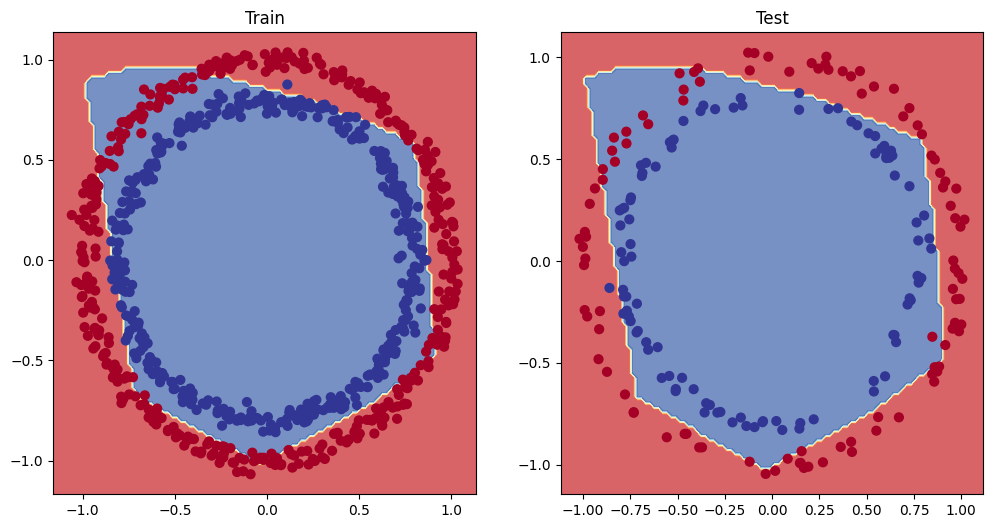

In [54]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show()

## More classification evaluation metrics

Alongside visualizing our model results as much as possible, there are a handful of other classification methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [55]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.9100
Model loss on the test set: 0.29144182801246643
Model accuracy on the test set: 91.00%


How about a confusion matrix?

In [57]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
# Make predictions
y_preds = model_10.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [58]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [59]:
y_preds[:10]

array([[0.854143  ],
       [0.854143  ],
       [0.7701754 ],
       [0.854143  ],
       [0.02853971],
       [0.02588161],
       [0.854143  ],
       [0.60407513],
       [0.8487727 ],
       [0.08806875]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [60]:
# Convert our predictions probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [61]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[85, 16],
       [ 2, 97]])

How about we prettify confusion matrix?

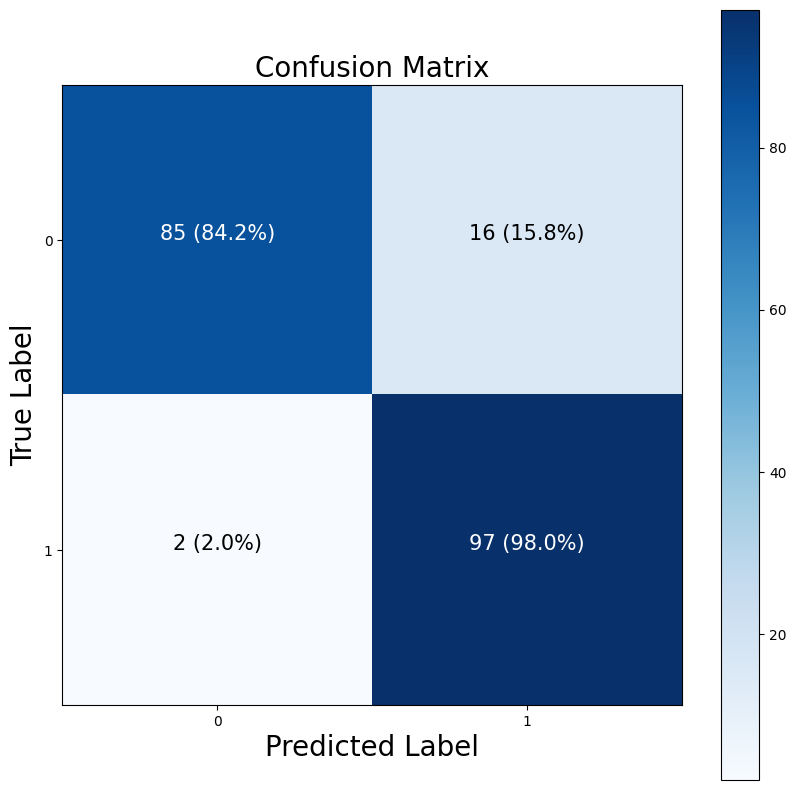

In [62]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False
if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [63]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [64]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [65]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

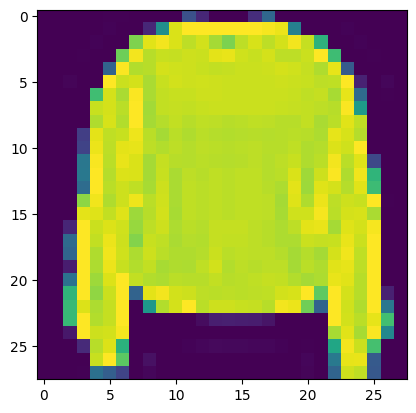

In [66]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [67]:
# Check out samples label
train_labels[7]

2

In [68]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Andkle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Dress')

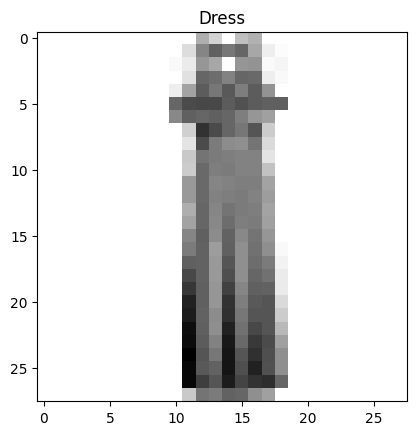

In [69]:
# Plot an example image and its label
index_of_choice = 250
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

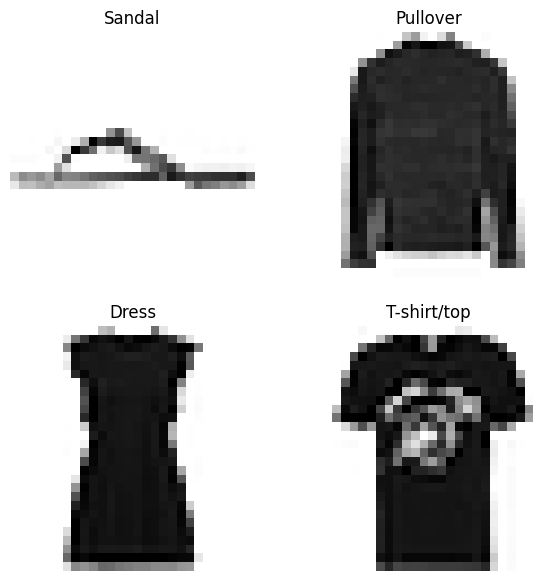

In [70]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifires, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Ouput shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [71]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [74]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3060 - accuracy: 0.1482 - val_loss: 2.0788 - val_accuracy: 0.1967
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8647 - accuracy: 0.2410 - val_loss: 1.6952 - val_accuracy: 0.2715
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6302 - accuracy: 0.3225 - val_loss: 1.6082 - val_accuracy: 0.3590
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5532 - accuracy: 0.3454 - val_loss: 1.5080 - val_accuracy: 0.3607
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5298 - accuracy: 0.3562 - val_loss: 1.5145 - val_accuracy: 0.3644
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4668 - accuracy: 0.3904 - val_loss: 1.4962 - val_accuracy: 0.3788
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4047 - accuracy: 0.4149 - val_loss: 1.3909 - val_accuracy:

In [75]:
# Check the model summary
model_11.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
# Check the min and max values of the traingin data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [78]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [80]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1258 - accuracy: 0.5969 - val_loss: 0.7424 - val_accuracy: 0.7310
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6882 - accuracy: 0.7506 - val_loss: 0.6736 - val_accuracy: 0.7476
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6328 - accuracy: 0.7742 - val_loss: 0.6302 - val_accuracy: 0.7755
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6044 - accuracy: 0.7858 - val_loss: 0.6150 - val_accuracy: 0.7847
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5860 - accuracy: 0.7910 - val_loss: 0.6020 - val_accuracy: 0.7825
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5702 - accuracy: 0.7958 - val_loss: 0.5813 - val_accuracy: 0.7947
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5557 - accuracy: 0.8024 - val_loss: 0.5738 - val_accuracy:

<Axes: title={'center': 'Nromalized data'}>

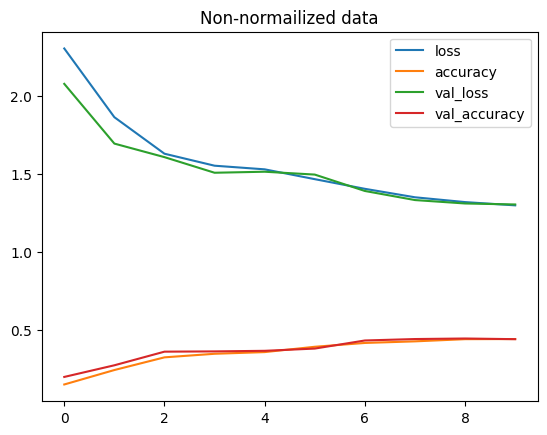

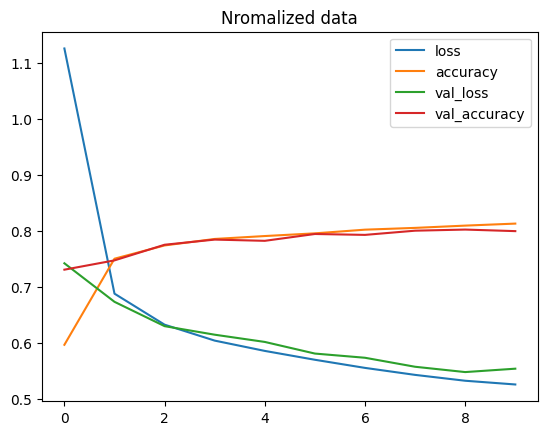

In [81]:
import pandas as pd
# Plot non-normailized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normailized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Nromalized data")

## Finding the ideal learning rate

In [83]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2586 - accuracy: 0.5628 - val_loss: 0.8752 - val_accuracy: 0.7029 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6808 - accuracy: 0.7665 - val_loss: 0.6586 - val_accuracy: 0.7648 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5898 - accuracy: 0.7929 - val_loss: 0.6031 - val_accuracy: 0.7855 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5582 - accuracy: 0.8048 - val_loss: 0.6009 - val_accuracy: 0.7916 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5393 - accuracy: 0.8105 - val_loss: 0.5677 - val_accuracy: 0.8007 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5279 - accuracy: 0.8141 - val_loss: 0.5795 - val_accuracy: 0.7999 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

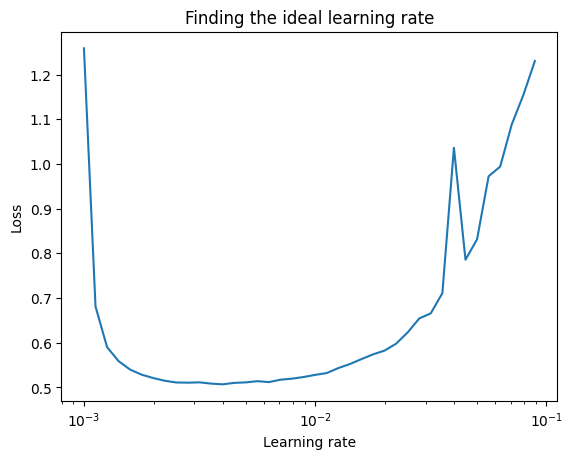

In [84]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [86]:
# Let's refit a model with ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4170 - accuracy: 0.4244 - val_loss: 1.1249 - val_accuracy: 0.5571
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0360 - accuracy: 0.6005 - val_loss: 0.9932 - val_accuracy: 0.6182
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9484 - accuracy: 0.6382 - val_loss: 0.9516 - val_accuracy: 0.6358
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9057 - accuracy: 0.6569 - val_loss: 0.9091 - val_accuracy: 0.6570
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8815 - accuracy: 0.6719 - val_loss: 0.9134 - val_accuracy: 0.6675
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8576 - accuracy: 0.6842 - val_loss: 0.8609 - val_accuracy: 0.6864
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8350 - accuracy: 0.6954 - val_loss: 0.8602 - val_accuracy:

## Evaluating our mulit-class model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top2...


In [88]:
# Create a confusion matrix

# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,
                          y_pred,
                          classes=None,
                          figsize=(10, 10),
                          text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
      labels = classes
  else:
      labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [89]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Andkle boot']

In [90]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for prediction probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[9.2854905e-05, 3.7079724e-07, 1.0276767e-08, 2.5386025e-06,
        1.1646185e-09, 3.3812910e-01, 2.7047161e-06, 2.9700877e-02,
        1.4415394e-05, 6.3205713e-01],
       [1.0710738e-02, 4.3420616e-05, 8.1717038e-01, 3.9669126e-06,
        3.0557027e-02, 7.1509314e-17, 1.4151448e-01, 0.0000000e+00,
        1.4488695e-07, 2.5357458e-25],
       [4.3296741e-06, 9.9843073e-01, 3.8575979e-07, 1.0506329e-03,
        2.4266155e-06, 5.0577927e-07, 1.8148661e-05, 4.9974191e-31,
        4.9299665e-04, 2.9026642e-23],
       [1.7363542e-06, 9.9921113e-01, 1.5458743e-07, 5.7968823e-04,
        1.1529498e-06, 1.6691789e-07, 8.1678972e-06, 7.0344521e-33,
        1.9781871e-04, 1.4080969e-24],
       [4.2021284e-01, 6.1610509e-03, 9.3047686e-02, 1.6124630e-02,
        1.6405499e-02, 1.3984865e-05, 4.3852571e-01, 4.9570175e-21,
        9.5086610e-03, 3.0639707e-10]], dtype=float32)

In [91]:
y_probs[0]

array([9.2854905e-05, 3.7079724e-07, 1.0276767e-08, 2.5386025e-06,
       1.1646185e-09, 3.3812910e-01, 2.7047161e-06, 2.9700877e-02,
       1.4415394e-05, 6.3205713e-01], dtype=float32)

In [93]:
# Conver all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 6, 6, 5, 7])

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[685,   0,  18,  89,   9,  10, 141,   0,  43,   5],
       [  5, 887,   2,  73,   3,   0,  13,   0,  17,   0],
       [ 32,   0, 450,  25, 202,   0, 281,   0,  10,   0],
       [ 19,   8,   5, 757,  58,   5,  78,   0,  70,   0],
       [  4,   1, 139, 117, 626,   0, 110,   0,   3,   0],
       [  3,   0,   0,   0,   0, 825,   0,  81,  11,  80],
       [169,   2, 170,  73, 145,   8, 390,   0,  43,   0],
       [  0,   0,   0,   0,   0,  52,   0, 888,   0,  60],
       [ 29,  12,   4,  68,   4,  31,  25,   9, 817,   1],
       [  1,   0,   0,   0,   0,  40,   0,  40,   0, 919]])

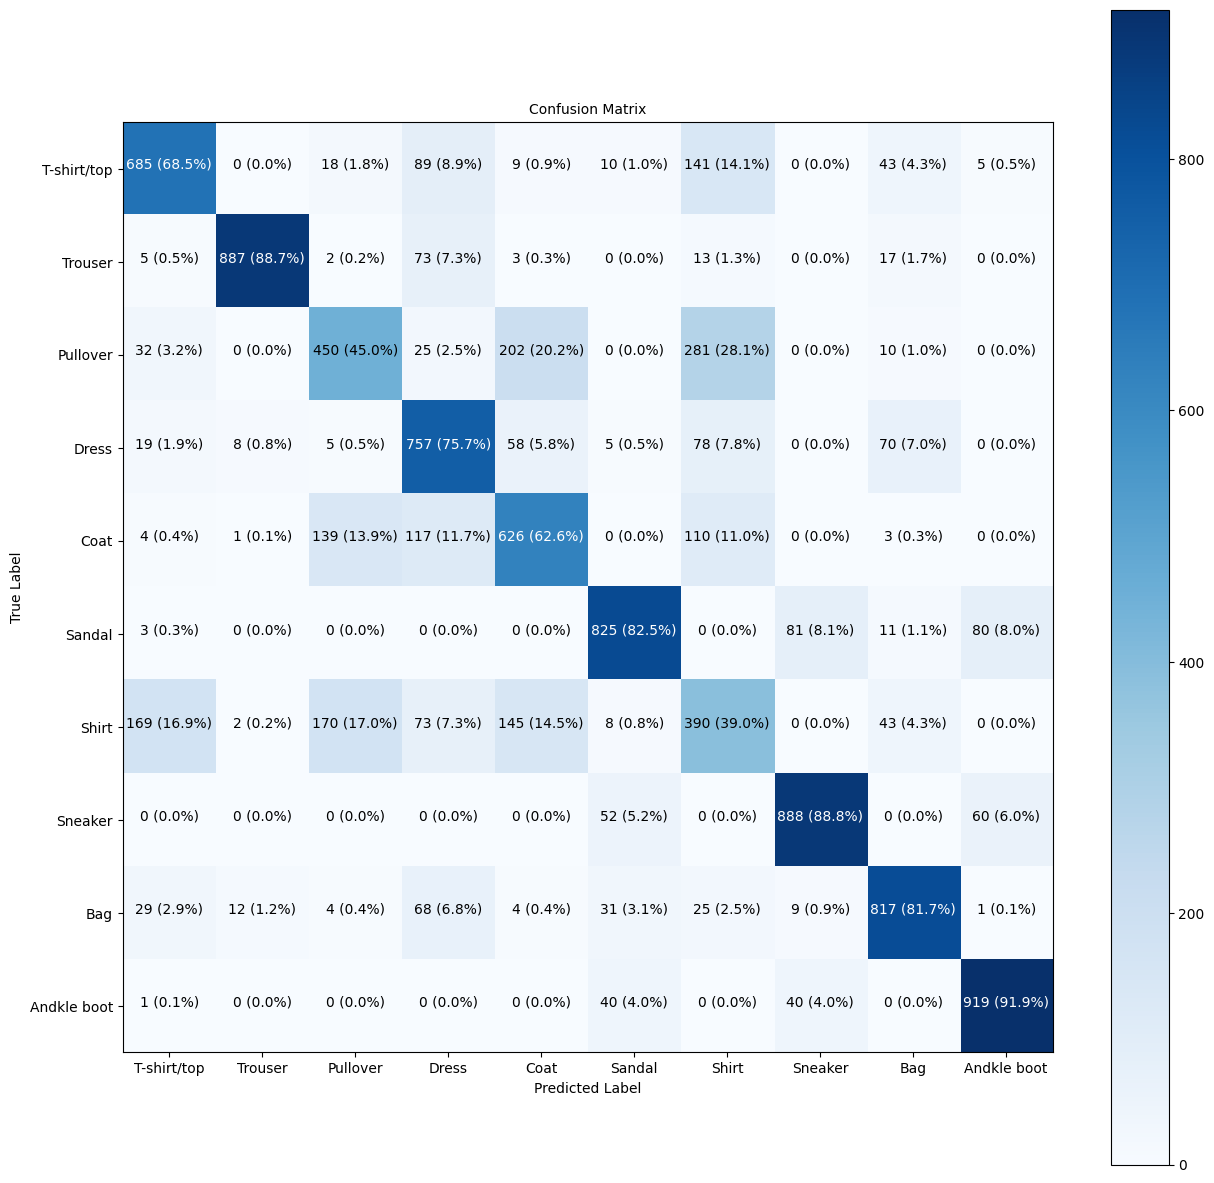

In [95]:
# Make a prettier confusion matrix
make_confusion_matrix(test_labels,
                      y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [103]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a ramdom image, plots it and labels it with a prediction and truth label.
  """

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28), verbose=0)
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel infromation (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color ro green or red based on if prediction is right or wrong

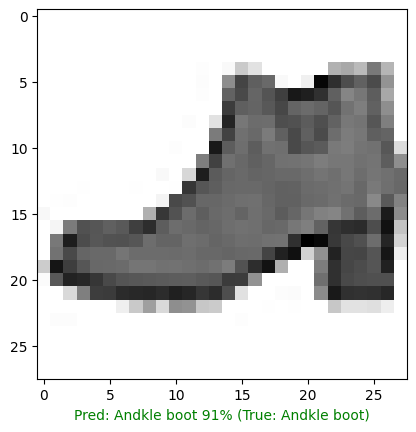

In [118]:
# Check out a random image as well as its prediction
plot_random_image(model_14,
                  test_data_norm,  # always make prediction on the same kind of data your model was trained on
                  test_labels,
                  class_names)

## What patterns is our model learning?